In [ ]:
import pandas as pd
df = pd.read_csv("ADNIMERGE_25Apr2025.csv")

# Check for key columns
print("APOE4 column exists:", 'APOE4' in df.columns)
print("CSF Aβ42 column exists:", 'ABETA' in df.columns)
print("CSF p-Tau column exists:", 'PTAU' in df.columns)

APOE4 column exists: True
CSF Aβ42 column exists: True
CSF p-Tau column exists: True


<ipython-input-2-2b9067a55bb8>:2: DtypeWarning: Columns (19,20,21,50,51,104,105,106) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("ADNIMERGE_25Apr2025.csv")


Now we confirm that the ADNIMERGE Dataset contains the geetic and the CSF data we will also confirm if the neuroimaging data of MRI nad PET are present as well


=== CLINICAL ===
Exists: ['PTID', 'VISCODE', 'DX', 'AGE', 'MMSE', 'CDRSB', 'APOE4']
Missing: []
Missing % in existing columns:
  PTID: 0.0% missing
  VISCODE: 0.0% missing
  DX: 30.2% missing
  AGE: 0.1% missing
  MMSE: 30.2% missing
  CDRSB: 28.5% missing
  APOE4: 2.2% missing

=== MRI ===
Exists: ['Hippocampus', 'Entorhinal', 'MidTemp', 'WholeBrain', 'ICV']
Missing: []
Missing % in existing columns:
  Hippocampus: 46.1% missing
  Entorhinal: 48.6% missing
  MidTemp: 48.6% missing
  WholeBrain: 40.7% missing
  ICV: 38.4% missing

=== PET ===
Exists: ['AV45', 'FDG']
Missing: ['SUVR']
Missing % in existing columns:
  AV45: 81.2% missing
  FDG: 77.5% missing

=== CSF ===
Exists: ['ABETA', 'TAU', 'PTAU']
Missing: []
Missing % in existing columns:
  ABETA: 85.6% missing
  TAU: 85.6% missing
  PTAU: 85.6% missing


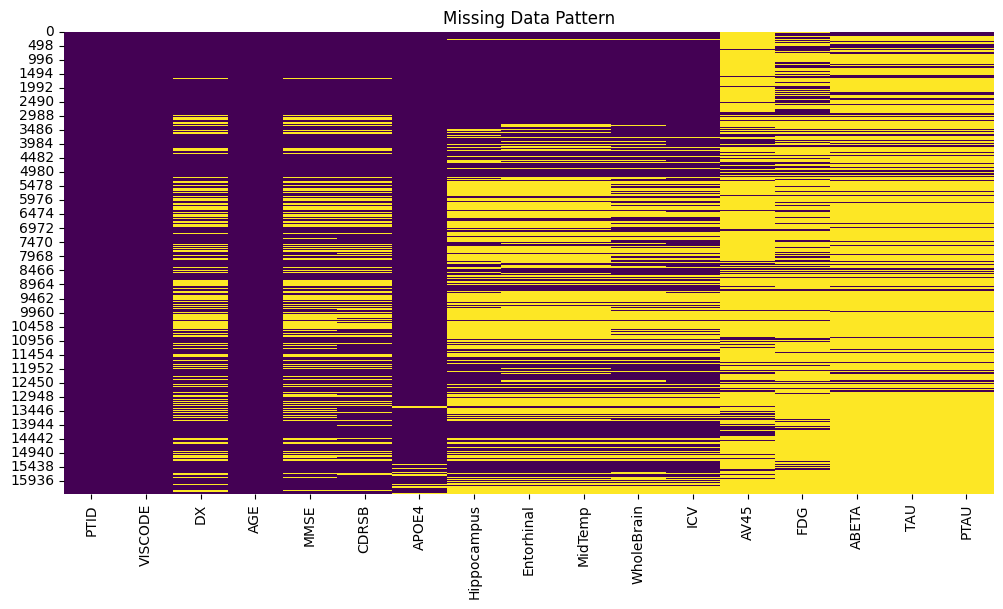

In [ ]:
# Check for key columns

import numpy as np



# Define the columns to check (grouped by modality)
expected_cols = {
    'Clinical': ['PTID', 'VISCODE', 'DX', 'AGE', 'MMSE', 'CDRSB', 'APOE4'],
    'MRI': ['Hippocampus', 'Entorhinal', 'MidTemp', 'WholeBrain', 'ICV'],
    'PET': ['AV45', 'FDG', 'SUVR'],  # SUVR is common for amyloid PET
    'CSF': ['ABETA', 'TAU', 'PTAU']
}

# Check column existence and missingness
results = {}
for modality, cols in expected_cols.items():
    existing_cols = [col for col in cols if col in df.columns]
    missing_cols = [col for col in cols if col not in df.columns]

    # Calculate missing percentage for existing columns
    missing_pct = {}
    for col in existing_cols:
        missing_pct[col] = f"{np.round(df[col].isna().mean()*100, 1)}%"

    results[modality] = {
        'exists': existing_cols,
        'missing': missing_cols,
        'missing_pct': missing_pct
    }

# Print results
for modality, data in results.items():
    print(f"\n=== {modality.upper()} ===")
    print(f"Exists: {data['exists']}")
    print(f"Missing: {data['missing']}")
    if data['exists']:
        print("Missing % in existing columns:")
        for col, pct in data['missing_pct'].items():
            print(f"  {col}: {pct} missing")

# Optional: Visualize missingness
import matplotlib.pyplot as plt
import seaborn as sns

# Create missingness matrix for existing columns
existing_all = [col for cols in results.values() for col in cols['exists']]
plt.figure(figsize=(12, 6))
sns.heatmap(df[existing_all].isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Pattern")
plt.show()